0.6633249580710799
2.0336710919033127e+26
9.34371995222472


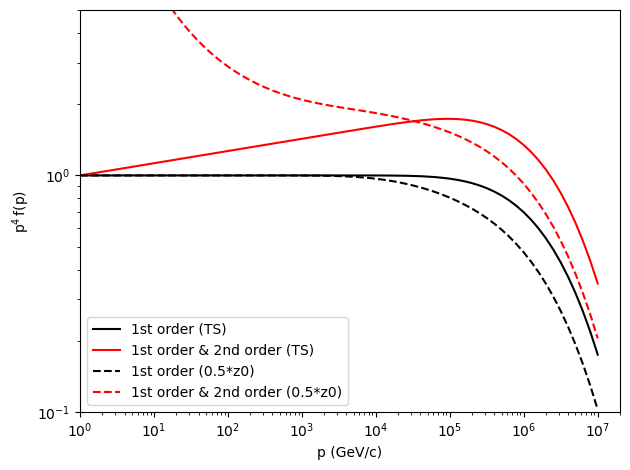

In [64]:
import matplotlib.pyplot as plt
import numpy as np

pc = 3e18
z0 = 96*pc
u1 = 2.8e8
u2 = u1/4
etaB = 0.01
vA1 = u1*np.sqrt(etaB)
vA2 = u1*np.sqrt(etaB) * (np.sqrt(11)/2)

Sqrt_Delta = np.sqrt(np.power(u2,2)-4/9*np.power(vA2,2))
print(vA2/u2)

# diffusion coefficient

D10 = 1.4e26*np.power(etaB,-1/6)*np.power(1.5,-1/15)*np.power(2.8,-2/15)*np.power(2,-1/10)*np.power(3/10,2/15)
print(D10)

def D1_fun(p_):
    return D10*np.power(p_/1e0, 1/3)

def D2_fun(p_):
    return 0.67*D10*np.power(p_/1e0, 1/3)

p = np.power(10, np.linspace(0, 7, num=7001, endpoint=True)) # GeV/c
p_sparse = np.power(10, np.linspace(0, 7, num=71, endpoint=True)) # GeV/c

D1 = D1_fun(p)
D2 = D2_fun(p)
D1_sparse = D1_fun(p_sparse)
D2_sparse = D2_fun(p_sparse)

# timescale ratio at 1 PeV

tau_sa = 9*D2[6000]/np.power(vA2,2)
tau_esc = np.power(z0,2)/D2[6000]
print(tau_sa/tau_esc)

# spectrum at the shock

f0_1 = np.zeros(71)
f0_2 = np.zeros(71)

for i in range(71):
    Int_1 = 0
    Int_2 = 0
    for j in range(i*100):
        Int_1 += -3*u2/(u2-u1)/(1-np.exp(u2*z0/D2[j]))/p[j]*(p[j+1]-p[j])
        Int_2 += -(3/2*u2/(u2-u1)+3*Sqrt_Delta/(u2-u1)*(1/(1-np.exp(Sqrt_Delta*z0/D2[j]))-1/2))/p[j]*(p[j+1]-p[j])
    f0_1[i] = np.power(p_sparse[i],3*u1/(u2-u1))*np.exp(Int_1)
    f0_2[i] = np.power(p_sparse[i],3*u1/(u2-u1))*np.exp(Int_2)

# spectrum at z=0.5z0

z = 0.5*z0

B1 = (u2+Sqrt_Delta)/2/D2_sparse
B2 = (u2-Sqrt_Delta)/2/D2_sparse

f_1 = np.zeros(71)
f_2 = np.zeros(71)

for i in range(71):
    f_1[i] = f0_1[i]/(1-np.exp(-u2*z0/D2_sparse[i]))*(1-np.exp(u2*(z-z0)/D2_sparse[i]))
    f_2[i] = f0_2[i]/(1-np.exp((B1[i]-B2[i])*z0))*(np.exp(B1[i]*z)-np.exp((B1[i]-B2[i])*z0)*np.exp(B2[i]*z))

# plot1

fig, ax = plt.subplots()

ax.plot(p_sparse, np.power(p_sparse,4)*f0_1, ls="-", c="black", label="1st order (TS)")
ax.plot(p_sparse, np.power(p_sparse,4)*f0_2, ls="-", c="red", label="1st order & 2nd order (TS)")

ax.plot(p_sparse, np.power(p_sparse,4)*f_1, ls="--", c="black", label="1st order (0.5*z0)")
ax.plot(p_sparse, np.power(p_sparse,4)*f_2, ls="--", c="red", label="1st order & 2nd order (0.5*z0)")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e0,2e7)
ax.set_ylim(1e-1,5e0)
ax.set_xlabel("p (GeV/c)")
ax.set_ylabel(r"$\rm p^{4} \, f(p)$")
ax.legend(loc="lower left")
plt.tight_layout()
plt.savefig("1D_planar_tau_acc.png", dpi=500)
plt.show()